# Pointilism usage examples

## Import class definitions

In [12]:
from pointillism import pointillize, pointillizeStack

# Usage examples

## 1) Read image or directory of images, run routines, save

In [13]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0290.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)

In [14]:
# Run routines
point.plotRecPoints(40, 40, False)
point.plotRandomPointsComplexity(10e3,0.01,1.3)  

plotRecPoints took 1.98 sec
plotRandomPointsComplexity took 7.10 sec


images/IMG_0290.jpg


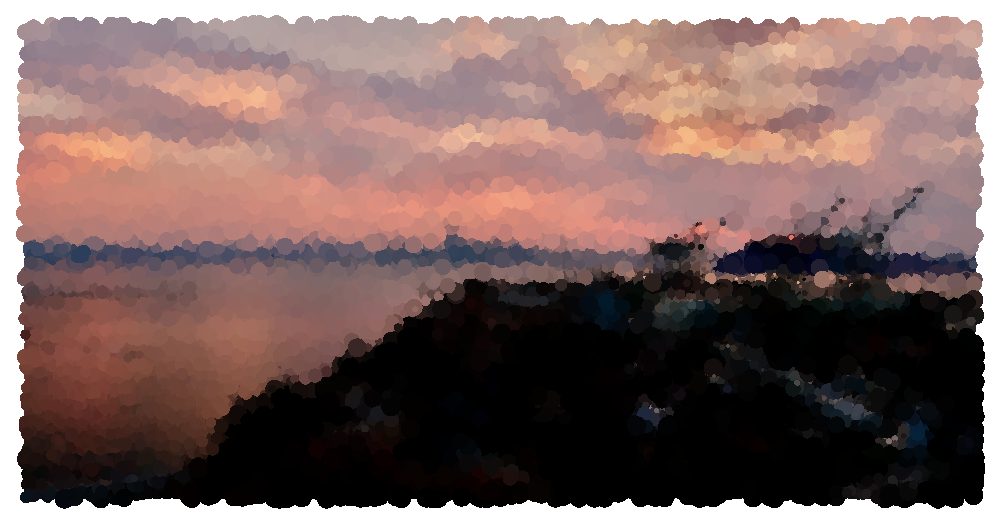

In [15]:
# Save out
point.display()
point.save_out(location = 'out_testing', suffix = 'basic test')

## 2) Build a pipeline and execute

In [16]:
# Create instance
point = pointillizeStack(location='images/IMG_0290.jpg', debug = True, border = 0)
point.crop_Y([1000,500], False)

# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.plotRecPoints,[25, 25, False],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1.3],1)

# Display queue
point.print_queue()

plotRecPoints [25, 25, False] 1
plotRandomPointsComplexity [2000.0, 0.01, 1.3] 1


In [17]:
# Run queue
point.run_queue(save_steps = True)

plotRecPoints: 1 done
plotRandomPointsComplexity: 1 done


## 3) Build image stacks using pipeline and save as gif of intermediate images

In [18]:
# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1.3],10)

# Build image stacks
point.build_stacks(1, True)

plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


In [19]:
# Save
point.save_gif('animated_stacking.gif', 0.1)

## 4) Build image stacks using pipeline and save as gif of final images

In [20]:
# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.plotRecPoints,[25, 25, False],1)
point.add_to_queue(point.plotRandomPointsComplexity,[1e4,0.01,1.3],1)

# Build image stacks
point.build_stacks(10, False)

Building image:  0 1 2 3 4 5 6 7 8 9 done


In [21]:
# Save
point.save_gif('animated_stacking_loop.gif', 0.1)

In [22]:
# Display
from IPython.display import HTML
HTML('<img src="animated_stacking_loop.gif">')

# <--Working section below  --->

# Notes
* Look into reading in movies, and saving gifs as movies
* Figure out how to set the rate for the gifs, or go back to using ImageIO
* Fix up debug messages
* Look into better way to do optional arguments, and clean up
* Test outputs against original script to make sure they are what I want
* 


In [23]:
%run pointillism.py

# Create instance
point = pointillizeStack(location='images/IMG_0290.jpg', debug = True)

# Print attributes
point.print_attributes()

filenames :  ['images/IMG_0290.jpg']
images :  [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3968x2976 at 0x245B20E2630>]
arrays : 1  numpy array(s)   
border :  100
outs :  [<PIL.Image.Image image mode=RGBA size=4168x3176 at 0x24580080278>]
debug :  True
params :  {'complexity_radius': 10}


In [24]:
import pointillism
help(pointillism)

Help on module pointillism:

NAME
    pointillism - This module contains classes that help create pointillized images.

CLASSES
    builtins.object
        pointillize
            pointillizeStack
    
    class pointillize(builtins.object)
     |  Base class for pointillzation project
     |  
     |  Methods defined here:
     |  
     |  __init__(self, *args, **kwargs)
     |      Initiialize with image or directory
     |  
     |  crop_Y(self, aspect, resize)
     |      Crops and resizes in the height dimension to match aspect ratio
     |  
     |  display(self)
     |      Displays browser-size version of images
     |  
     |  plotRandomPoints(self, n, constant, power)
     |      plots random points over image, where constant is
     |      the portion of the width for the max size of the bubble, 
     |      and power pushes the distribution towards smaller bubbles
     |  
     |  plotRandomPointsComplexity(self, n, constant, power)
     |      plots random points over ima